# UCL AI Society Machine Learning Tutorials
### Session 01. Introduction to Numpy, Pandas and Matplotlib Libraries

### Contents
1. Numpy
2. Pandas
3. Matplotlib
4. EDA

### Aim
At the end of this session, you will be able to:
- Understand the basics of numpy.
- Understand the basics of pandas.
- Understand the basics of matplotlib.
- Build a simple EDA (Exploratory Data Analysis) using above libraries.

## 4. EDA (Exploratory Data Analysis)
To build and train machine learning model more efficiently, Exploratory Data Analysis, or EDA for short, should precede the building the training model. This statistical approach was introduced by Professor John Tukey, also widely known for fast fourier transform (FFT). 
The main goal of EDA is to analyze the data sets to understand its main characteristics, often with visualization, summary table and statistics. The one thing to note is that the term of visualization should be differentiated with EDA as the former is mainly for final stage of analysis, communication of results, and the latter is conducted at the beginning of the task.

Remember the quote, "Garbage In, Garbge Out!".

The **basic order of EDA** theoretically is:
   1. Find the questions on the data set.
   2. Find the answer on the data set using visualization, transformation and modelling.
   3. Go deeper into the question through answers and find new questions.
   4. Tasks 1-3 are done iteratively and repetitively, not perfectly at once.

### 4.1 Import Libraries and Data
The dataset can be downloaded here: https://www.kaggle.com/c/nyc-taxi-trip-duration/data
The dataset is provided by Google Cloud Platform and is based on the 2016 NYC Yellow Cab trip record. It is roughly pre-processed before its releasing and practicing EDA with dataset would help understand how EDA is typically performed. 
- train.csv - the training set containing 1,458,644 trip records (Or download at here: https://drive.google.com/file/d/1Z2hIOjNRSAExIVk_KMjXKgI3xctpGK5t/view?usp=sharing)
- test.csv - the testing set contatining 625,134 trip records (Or download at here: https://drive.google.com/file/d/1-R9Npmr-Ik98vuP8BCI_Oh6ehE30fw70/view?usp=sharing)


Libraries that we covered so far, Numpy, Pandas, and Matplotlib, are main tools for EDA. Plus, `seaborn` is another famous library mainly for visualization.

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Since it takes very long time to load the original dataset
# we set nrows = 5_000_000 to shorten the loading time. 
train = pd.read_csv("./data/nyc-taxi-train.csv", nrows = 5_000_000)

In [4]:
# Let's see how the data is comprised.
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
test = pd.read_csv("./data/nyc-taxi-test.csv")

In [6]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


### 4.2 Check the Characteristics
- `info()` : Gives brief information
- `shape` : Returns data shape, (rows, columns)
- `dtypes` : Returns data types of each columns
- `describe()` : Returns the data statistics
- `keys()` : Returns the the keys of columns

In [7]:
# To Do: Brief Information of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: float64(5), int64(1), object(2)
memory usage: 305.2+ MB


In [8]:
# To Do: Return data shape
train.shape

(5000000, 8)

In [9]:
# To Do: Return data types
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
# To Do: Return the data statistics
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,2.080000e+02


### 4.3 Check the Null Values
Check null values or anamolies(or outliers) in data set is essential to build a stronger machine learning algorithm.

As you can see right above table, the three facts are unrealistic:
- `min` of `fare_amount` is negative (and for reference, base charge is $2.5). 
- `min` of `passenger_count` is 0.
- The `longitude` and `latitude` of NYC is around -74 and 41, repectively. 

These anamolies should be erased along with null data. Also, we will remove missing data using `isnull()` and `dropna()`.

In [11]:
# To Do: Return the keys of the columns
train.keys()

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [12]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    36
dropoff_latitude     36
passenger_count       0
dtype: int64

In [13]:
# as you can see, there are 'weird' fare_amount on the table.
train[train['fare_amount'] < 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2010-03-09 23:37:10.0000005,-2.90,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2015-03-22 05:14:27.0000001,-2.50,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,2013-08-30 08:57:10.0000002,-3.00,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
28839,2013-08-11 13:39:10.0000001,-2.50,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,2015-04-30 15:19:45.0000003,-2.50,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,2015-03-09 10:29:46.0000004,-5.00,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
56748,2015-06-26 01:13:18.0000002,-5.00,2015-06-26 01:13:18 UTC,-73.979797,40.743240,-73.981216,40.737240,6
58937,2010-02-19 23:47:10.0000002,-44.90,2010-02-19 23:47:10 UTC,-73.871120,40.773902,-73.676533,40.786890,1
97838,2015-06-07 02:54:14.0000004,-3.00,2015-06-07 02:54:14 UTC,-73.913246,40.766212,-73.914963,40.764065,5
102938,2010-02-10 12:33:10.0000004,-2.90,2010-02-10 12:33:10 UTC,-73.970775,40.783425,-73.973443,40.779775,1


In [14]:
# After removing the negative fare_amount data, the shape of data has changed.
train = train[train.fare_amount >= 0]
train.shape

(4999789, 8)

In [15]:
# minimum and maximum longitude test set
min(test.pickup_longitude.min(), test.dropoff_longitude.min()), \
max(test.pickup_longitude.max(), test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [16]:
# minimum and maximum latitude test
min(test.pickup_latitude.min(), test.dropoff_latitude.min()), \
max(test.pickup_latitude.max(), test.dropoff_latitude.max())

(40.568973, 41.709555)

Defining a bounding box of the New York city because there is a difference in minimum and maximum longitude and latitude of train and test dataset.

In [17]:
# Re-define the train data by removing anamoly data
train = train[((train['fare_amount'] >= 2.5)
              & (train['pickup_longitude'] > -74.3) & (train['pickup_longitude'] < -72.98) & (train['pickup_longitude'] != 0))
              & ((train['dropoff_longitude'] > -74.3) & (train['dropoff_longitude'] < -72.98) & (train['dropoff_longitude'] != 0)) 
              & ((train['pickup_latitude'] > 40.5) & (train['pickup_latitude'] < 41.8) & (train['pickup_latitude'] != 0)) 
              & ((train['dropoff_latitude'] > 40.5) & (train['dropoff_latitude'] < 41.8) & (train['dropoff_latitude'] != 0)) 
              & (train['passenger_count'] > 0)]

In [18]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.875951e+06,4.875951e+06,4.875951e+06,4.875951e+06,4.875951e+06,4.875951e+06
mean,1.132545e+01,-7.397512e+01,4.075108e+01,-7.397426e+01,4.075145e+01,1.690527e+00
std,9.669816e+00,3.837784e-02,2.954749e-02,3.748400e-02,3.274321e-02,1.314042e+00
min,2.500000e+00,-7.429941e+01,4.050025e+01,-7.429973e+01,4.050029e+01,1.000000e+00
25%,6.000000e+00,-7.399227e+01,4.073656e+01,-7.399158e+01,4.073560e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075335e+01,-7.398061e+01,4.075386e+01,1.000000e+00
75%,1.250000e+01,-7.396833e+01,4.076754e+01,-7.396535e+01,4.076841e+01,2.000000e+00
max,9.520000e+02,-7.298106e+01,4.169685e+01,-7.301178e+01,4.169126e+01,2.080000e+02


In [19]:
train.shape

(4875951, 8)

After deleting a bunch of null and anamolies, the data set size shrinked. However, this pre-processing will improve our understanding of data set and the performance of machine learning algorithm.

### 4.4 EDA Exercise
To Do: Do EDA on the test dataset as we did on the training dataset. 
1. Read test dataset (`root = ./data/nyc-taxi-test.csv`)
2. Check and remove null and outlier data.

In [20]:
# To Do

### 4.5 Visualization

The first thing to visualize is distribution of `fare_amount`. Distribution shape can be effectively plotted using Kernel Density Estimation and can be implemented via `sns.kdeplot(data, ...)`. For more information, refer this [official website](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

Text(0.5, 1.0, 'Distribution of Fare Amount')

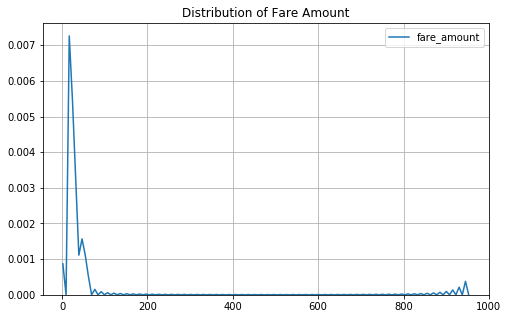

In [21]:
plt.figure(figsize = (8, 5))
plt.grid()
sns.kdeplot(train['fare_amount']).set_title("Distribution of Fare Amount")

From above table, the `mean` of `passenger_count` is 1.690527e+00, thus we can infer that most of passenger count is 1. 

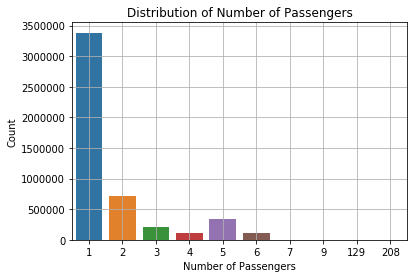

In [22]:
passenger_count = train.groupby(['passenger_count']).count()
sns.barplot(passenger_count.index, passenger_count['key'])
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.grid()
plt.title('Distribution of Number of Passengers')
plt.show()

Next, we become interested in the relationship between `distance` and `fare_amount`. Using `plt.scatter` function, plot a graph of `fare_amount` versus `distance`.

In [23]:
# calculate the trip distance in miles
# based on https://stackoverflow.com/questions/27928/
# Returns distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

In [24]:
train['distance'] = distance(train.pickup_latitude, 
                             train.pickup_longitude, 
                             train.dropoff_latitude, 
                             train.dropoff_longitude)

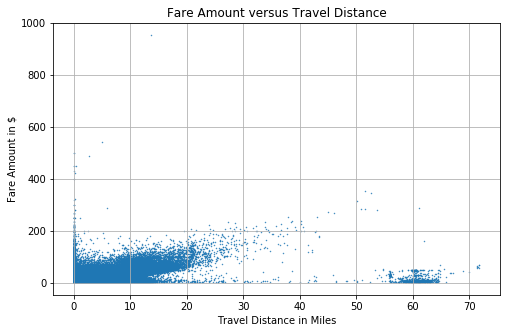

In [25]:
# To Do: Plot a scatter plot of fare_amount versus distance
plt.figure(figsize = (8, 5))
plt.scatter(x = train['distance'], y = train['fare_amount'], s = 0.2)
plt.xlabel("Travel Distance in Miles")
plt.ylabel("Fare Amount in $")
plt.title("Fare Amount versus Travel Distance")
plt.grid()
plt.show()

Can we think that taxi price increased as time goes by? Let's check. 


Acknowledgement: Thanks for inspiration and code [Reference](https://github.com/ekama0731/NYC-Taxi-Fare-Prediction/blob/master/NYC%20Taxi%20Fare%20Prediction.ipynb).

In [26]:
def date_columns(data):
    data['key'] = pd.to_datetime(data['key'], yearfirst=True)
    data['year'] = data['key'].dt.year
    data['month'] = data['key'].dt.month
    data['day'] = data['key'].dt.day
    data['weekday'] = data['key'].dt.weekday
    data['hour'] = data['key'].dt.hour

In [27]:
date_columns(train)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4875951 entries, 0 to 4999999
Data columns (total 14 columns):
key                  datetime64[ns]
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
distance             float64
year                 int64
month                int64
day                  int64
weekday              int64
hour                 int64
dtypes: datetime64[ns](1), float64(6), int64(6), object(1)
memory usage: 558.0+ MB


In [29]:
taxi = train.sort_values(by='key').reset_index()

In [30]:
year = train['key'].dt.year.astype(str)
month = train['key'].dt.month.astype(str)
day = train['key'].dt.day.astype(str)

In [31]:
date = year+"-"+month+"-"+day
date = pd.to_datetime(date)
year_month = year +'-'+month
year_month = pd.to_datetime(year_month)
train['year_month'] = year_month
train['date'] = date

C:\Users\hjkoo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


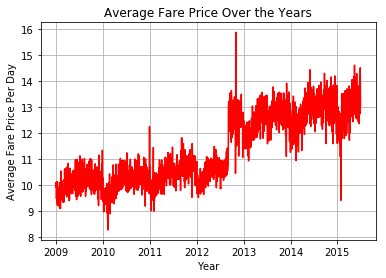

In [32]:
# To Do: Plot a graph of Average Fare Price over the years versus Average Fare Price per day.
taxi_rate = train.groupby(['date']).mean()
plt.plot(taxi_rate.index, taxi_rate.fare_amount, color = 'r')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Fare Price Per Day')
plt.title('Average Fare Price Over the Years')
plt.show()

This is not the end of EDA. As aforementioned, to build a stronger machine learning architecture, gaining a full insight on data should precede. Find more materials and implement EDA yourself.

### What to do next?
Below websites would be helpful for your further study on EDA:
- [Exploratory data analysis on Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
- [What is Exploratory Data Analysis?](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- [Introduction to Exploratory Data Analysis in Python](https://medium.com/python-pandemonium/introduction-to-exploratory-data-analysis-in-python-8b6bcb55c190)
- [Kaggle: New York City Taxi Fare Prediction Discussion](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/discussion)
- [Kaggle: NYC Taxi Fare - Data Exploration](https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration)